In [119]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

In [121]:
print("numpy:",np.__version__)
print("pandas:",pd.__version__)
print("matplotlib:",matplotlib.__version__)
print("seaborn:",sns.__version__)
print("sklearn:",sklearn.__version__)

numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.8.4
seaborn: 0.13.2
sklearn: 1.4.2


In [3]:
dataset=pd.read_csv("car_data.csv")

In [4]:
dataset.head(3)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,7.25


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


# Pre-Processing Steps:

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Car_Name_le=LabelEncoder()
dataset['Car_Name']=Car_Name_le.fit_transform(dataset['Car_Name'])

In [10]:
Fuel_Type_le=LabelEncoder()
dataset['Fuel_Type']=Fuel_Type_le.fit_transform(dataset['Fuel_Type'])

In [11]:
Seller_Type_le=LabelEncoder()
dataset['Seller_Type']=Seller_Type_le.fit_transform(dataset['Seller_Type'])

In [12]:
Transmission_le=LabelEncoder()
dataset['Transmission']=Transmission_le.fit_transform(dataset['Transmission'])

In [13]:
dataset.head(3)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
0,90,2014,5.59,27000,2,0,1,3.35
1,93,2013,9.54,43000,1,0,1,4.75
2,68,2017,9.85,6900,2,0,1,7.25


In [14]:
input_data=dataset.iloc[:,:-1]
output_data=dataset['Selling_Price']

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [18]:
input_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148
1,1.191828,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148
2,0.212627,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148
3,1.309332,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148
4,1.152659,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148
...,...,...,...,...,...,...,...
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.39148
297,0.134290,0.475308,-0.200292,0.593804,0.500183,-0.737285,0.39148
298,0.251795,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148
299,0.251795,1.168129,0.564504,-0.719876,-1.852241,-0.737285,0.39148


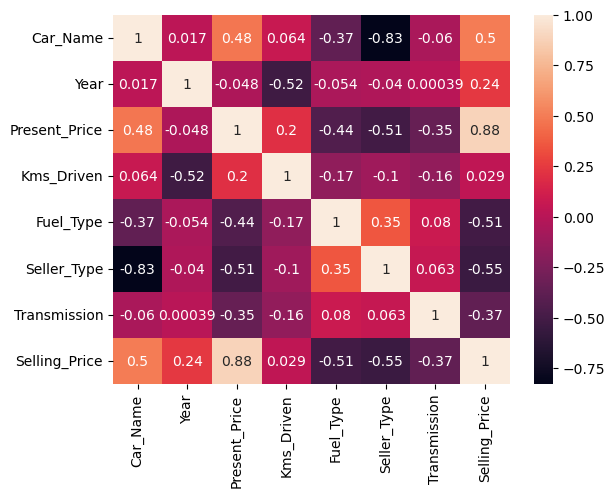

In [19]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

# Training & Testing Dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

## Supervised Machine Learning Model 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Linear Regression

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100

(88.19367764494304, 85.17977376981156)

In [29]:
mean_squared_error(y_test,lr.predict(x_test)),mean_absolute_error(y_test,lr.predict(x_test))

(3.4139257393532816, 1.1831140240801776)

# DecisionTree

In [31]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [32]:
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 94.41811571571553)

In [33]:
mean_squared_error(y_test,dt.predict(x_test)),mean_absolute_error(y_test,dt.predict(x_test))

(1.2858196721311477, 0.7055737704918033)

# Random Forest

In [35]:
rf=RandomForestRegressor(n_estimators=60)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=60)

In [36]:
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(98.50307293890074, 96.84127568523948)

In [37]:
mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test))

(0.7276306092896178, 0.5528251366120221)

# Support Vector Machine

In [39]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [40]:
svr.score(x_train,y_train)*100 , svr.score(x_test,y_test)*100

(65.32878689588357, 77.48465396241194)

In [41]:
mean_squared_error(y_test,svr.predict(x_test)),mean_absolute_error(y_test,svr.predict(x_test))

(5.186541566524417, 1.0033288767961779)

# KNN

In [43]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [44]:
knn.score(x_train,y_train)*100 , knn.score(x_test,y_test)*100

(91.41320799136709, 93.27008576404174)

In [45]:
mean_squared_error(y_test,knn.predict(x_test)),mean_absolute_error(y_test,knn.predict(x_test))

(1.5502750819672133, 0.6892131147540984)

# Random Forest is best among all of them

In [47]:
new_Data=pd.DataFrame([["jazz",2016,8.4,12000,"Petrol","Dealer","Manual"]],columns=x_train.columns)

In [48]:
new_Data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,jazz,2016,8.4,12000,Petrol,Dealer,Manual


In [49]:
new_Data['Car_Name']=Car_Name_le.transform(new_Data['Car_Name'])

In [50]:
new_Data['Fuel_Type']=Fuel_Type_le.transform(new_Data['Fuel_Type'])

In [51]:
new_Data['Seller_Type']=Seller_Type_le.transform(new_Data['Seller_Type'])

In [52]:
new_Data['Transmission']=Transmission_le.transform(new_Data['Transmission'])

In [53]:
new_Data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,87,2016,8.4,12000,2,0,1


In [54]:
new_Data=pd.DataFrame(ss.transform(new_Data),columns=new_Data.columns)

In [55]:
new_Data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,0.956819,0.821718,0.089403,-0.642601,0.500183,-0.737285,0.39148


In [56]:
rf.predict(new_Data)

array([6.60483333])

# Exporting Model

In [58]:
# import pickle
# pickle.dump(dataset,open('dataset.pkl','wb'))
# pickle.dump(rf,open('rf.pkl','wb'))

In [117]:
# Save the encoders and scaler
# with open('Car_Name_le.pkl', 'wb') as f:
#     pickle.dump(Car_Name_le, f)
# with open('Fuel_Type_le.pkl', 'wb') as f:
#     pickle.dump(Fuel_Type_le, f)
# with open('Seller_Type_le.pkl', 'wb') as f:
#     pickle.dump(Seller_Type_le, f)
# with open('Transmission_le.pkl', 'wb') as f:
#     pickle.dump(Transmission_le, f)
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(ss, f)